# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [1]:
import pandas as pd

In [2]:
rev = pd.read_csv('reviews_sample.csv', delimiter=',')
rev

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [3]:
# Загружаем данные из файла recipes_sample.csv и оставляем только нужные столбцы
rec = pd.read_csv("recipes_sample.csv")[['name', 'id', 'minutes', 'submitted', 'description', 'n_ingredients']]
rec

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


In [4]:
# Если нужно начать индексирование с 1

df = pd.read_csv("recipes_sample.csv")

# Добавление нового столбца 'Index' с индексами начиная с 1
df['Index'] = df.index + 1

# Установка 'Index' в качестве индекса DataFrame
df.set_index('Index', inplace=True)

df

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
Index,,,,,,,,
1,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
2,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
3,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
4,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
5,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29996,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29997,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29998,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [5]:
# Выбор случайных 5% строк из DataFrame
sample_rev = rev.sample(frac=0.05)
sample_rec = rec.sample(frac=0.05)

In [6]:
sample_rev

,Unnamed: 0,user_id,recipe_id,date,rating,review
90100,833919,593726,22547,2008-12-21,4,This recipe got mixed reviews at my Christmas ...
46617,44500,176615,64632,2005-05-07,5,"I was searching to post this yummy recipe, an ..."
93949,522563,753376,272511,2008-02-09,4,"I forgot the lime juice at the end, but it was..."
117229,461192,10033,13890,2003-11-28,5,I LOVED THIS RECIPE! I did not actually stuff ...
107895,958030,29782,68614,2006-08-14,5,WOW! this was great. We really enjoyed this r...
...,...,...,...,...,...,...
74721,1022984,167849,117723,2006-01-15,5,My husband whipped this up the other day and i...
67151,530139,428885,371301,2010-01-05,5,This is perfection as it is. I have come to ad...
93469,649433,271119,240359,2007-08-27,5,If my husband tells me after one bite that thi...
41717,564470,5441600,256914,2014-02-16,3,Turned out okay for me. Pretty wet and didn&#...


In [7]:
sample_rec

,name,id,minutes,submitted,description,n_ingredients
28301,twice baked potatoes for two,152471,85,2006-01-19,mashed potatoes with cream-style cottage chees...,10.0
22793,roasted minestrone soup,282412,80,2008-01-29,roasted vegetables make this one a hearty ital...,16.0
13839,homemade brown sugar substitute,188152,5,2006-09-27,found this recipe on the molasses bottle. goo...,2.0
25026,soutzoukakia mini greek meatballs,433324,85,2010-07-27,this is my husband's favorite dish! most of t...,15.0
4506,campfire mash potatoes yams onions turnips c...,184238,30,2006-08-31,"save the mesh bags that have avocados,\r\noran...",NaN
...,...,...,...,...,...,...
21221,pork chops with lemon and capers,61601,25,2003-05-07,this is another old recipe taken from my local...,9.0
3611,braised monkfish nicoise,291623,40,2008-03-13,i made this recipe years ago and it is very ni...,NaN
4697,caramelized onion stuffed pork loin with crisp...,411485,75,2010-02-02,this stuffed pork loin is moist and tender wit...,NaN
11102,flavored butter garlic and parsley butter,489589,5,2012-11-01,"gift or fridge. *uses: on grilled chicken, fis...",NaN


In [10]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
wb.sheets.add()  # Добавляем новый лист

<Sheet [recipes.xlsx]Лист2>

In [11]:
wb.sheets[0].name = 'Рецепты'
sht1 = wb.sheets['Рецепты']

wb.sheets[1].name = 'Отзывы'
sht2 = wb.sheets['Отзывы']

In [12]:
sht1.range('A1').value = sample_rec
sht2.range('A1').value = sample_rev

In [13]:
# выравниваем ширину строки
sht1.autofit()
sht2.autofit()

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [14]:
wb.sheets['Рецепты'].activate() # делаем активным лист Рецепты, т.е. sht1

# Получаем данные из столбца minutes
minutes_column = sht1.range('D2').expand('down').value     # sht1.range('minutes').value

# Умножаем значения на 60
seconds_column = [value * 60 for value in minutes_column]

# Добавляем новый столбец в Excel
sht1.range('H2').options(transpose=True).value = seconds_column

# sht1.range('G2').expand('down').offset(row_offset=1).value = new_column
# offset(row_offset=1): 
# для получения доступа к ячейке в той же колонке, но на одну строку ниже относительно текущей ячейки

In [15]:
sht1.range('H1').value = 'seconds_assign'
sht1.autofit()

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [19]:
# неэффективный вариант

#for i in range(1, len(sht1.range('D2').expand('down')) + 1):
#    sht1.range('I' + str(i)).formula = '=$D$' + str(i) + '*60'

In [23]:
sht1.range('I1').value = 'seconds_formula'
formula = '=60 * D2'
sht1.range('H2:H1501').formula = formula # sht1.range('H2:').expand('down').formula = formula

In [26]:
sht1.autofit()

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [21]:
from xlwings.constants import AutoFillType

In [29]:
sht1.range('A1').expand('right').font.bold = True
sht1['A1:H1'].api.horizontalalignment = xw.constants.HAlign.xlHAlignCenter

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

- (255, 0, 0) красный цвет
- (0, 255, 0) зеленый цвет
- (0, 0, 255) синий цвет
- (255, 255, 0) желтый цвет

In [30]:
minutes = sht1.range('D2').expand('down')
for i in minutes:
    if i.value < 5:
        i.color = (0, 255, 0) # зеленый цвет
    elif 5 <= i.value <= 10:
        i.color = (255, 255, 0) # желтый цвет
    elif i.value > 10:
        i.color = (255, 0, 0) # красный цвет

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [31]:
sht1.range('J1').value = 'n_reviews'
recps = sht1.range('C2').expand('down').options(ndim=1).value
rgn_name = sht2.range('D2').expand('down').address
c = 1
for i in recps:
    c += 1
    sht1.range('J' + str(c)).value = sht2.formula = f'=COUNTIF(c:c, {i})'

In [32]:
sht1.autofit()

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [33]:
def validate(rating):
    wb.sheets['Отзывы'].activate() # делаем активным лист Отзывы, т.е. sht2
    try:
        assert 0 <= rating <= 5, 'Рейтин должен быть в пределах от 0 до 5!'
        # Получаем данные из столбца minutes
        rating_column = sht2.range('F2').expand('down').value     # sht2.range('rating').value
        for ind,val in enumerate(rating_column):
            if val != rating:
                sht2.range(f'A{ind+2}').expand('right').color = (255, 0, 0)
    except AssertionError as err:
        print(err)

In [34]:
validate(10)

Рейтин должен быть в пределах от 0 до 5!


In [35]:
validate(5)

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [36]:
import csv

# определяем разделитель в csv файле
with open('recipes_model.csv', 'r') as file:
    first_line = file.readline()
    dialect = csv.Sniffer().sniff(first_line)
    print('Разделитель в файле:', dialect.delimiter)

Разделитель в файле: 	


In [54]:
import xlwings as xw

wb1 = xw.Book('recipes_model.xlsx')
wb1.sheets[0].name = 'Модель'
sht3 = wb1.sheets['Модель']

In [39]:
with open('recipes_model.csv') as file:
    sht3.range('A2').value = list(csv.reader(file, delimiter='	'))

In [40]:
sht3.autofit()

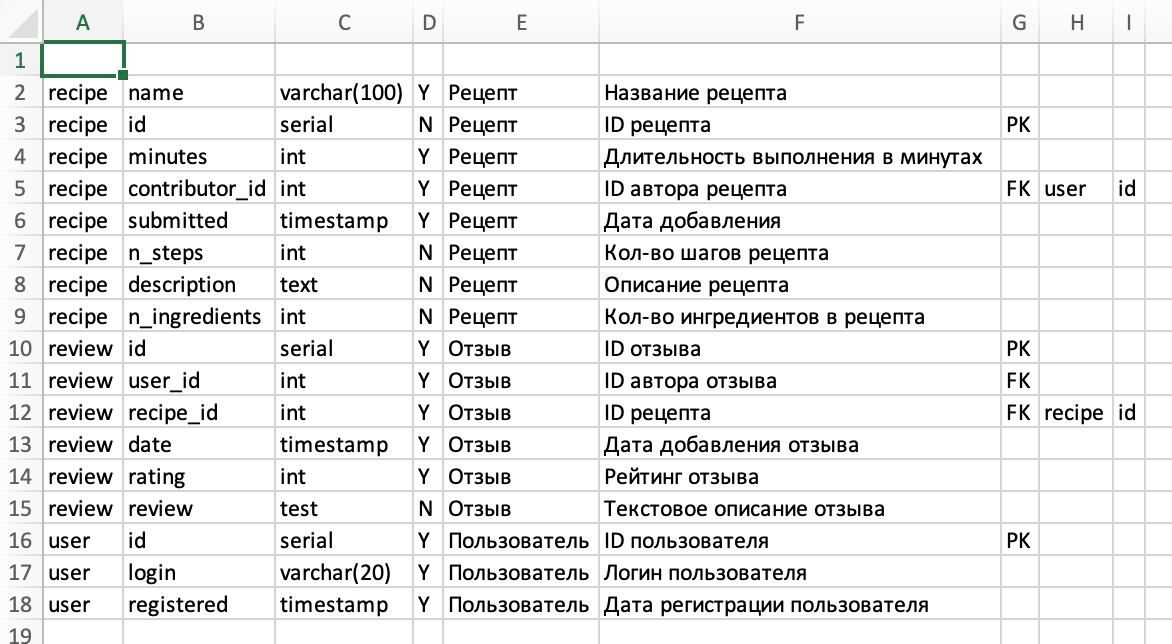

In [43]:
from IPython.display import Image
Image('/Users/test/Downloads/rec_mod1.jpg')

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [42]:
# Открываем книгу Excel
#wb = xw.Book('/Users/test/Downloads/recipes_model.xlsx')
#sht3 = wb.sheets['Модель']

# Заполняем столбец J с помощью формулы
fml = '=CONCAT(B2, " ", UPPER(C2), " ", IF(G2 = "PK", "PRIMARY KEY", IF(G2 = "FK", CONCAT("REFERENCES", " ", H2, "(", I2, ")"),)), " ", IF(AND(D2="Y", G2<>"PK"), "NOT NULL",))'
sht3.range('J2:J18').formula = fml

# Сохраняем изменения и закрываем книгу
#wb.save()
#wb.close()


1. CONCAT(B2, " ", UPPER(C2), " " - объединяет значения из ячеек B2 и C2 с пробелом между ними, а также преобразует значение из C2 в верхний регистр.

2. IF(G2 = "PK", "PRIMARY KEY", IF(G2 = "FK", CONCAT("REFERENCES", " ", H2, "(", I2, ")"),)) - проверяет значение в ячейке G2. Если оно равно "PK", то добавляется "PRIMARY KEY". Если оно равно "FK", то добавляется "REFERENCES" с значениями из ячеек H2 и I2.

3. IF(AND(D2="Y", G2<>"PK"), "NOT NULL",) - проверяет значения в ячейках D2 и G2. Если D2 равно "Y" и G2 не равно "PK", то добавляется "NOT NULL".


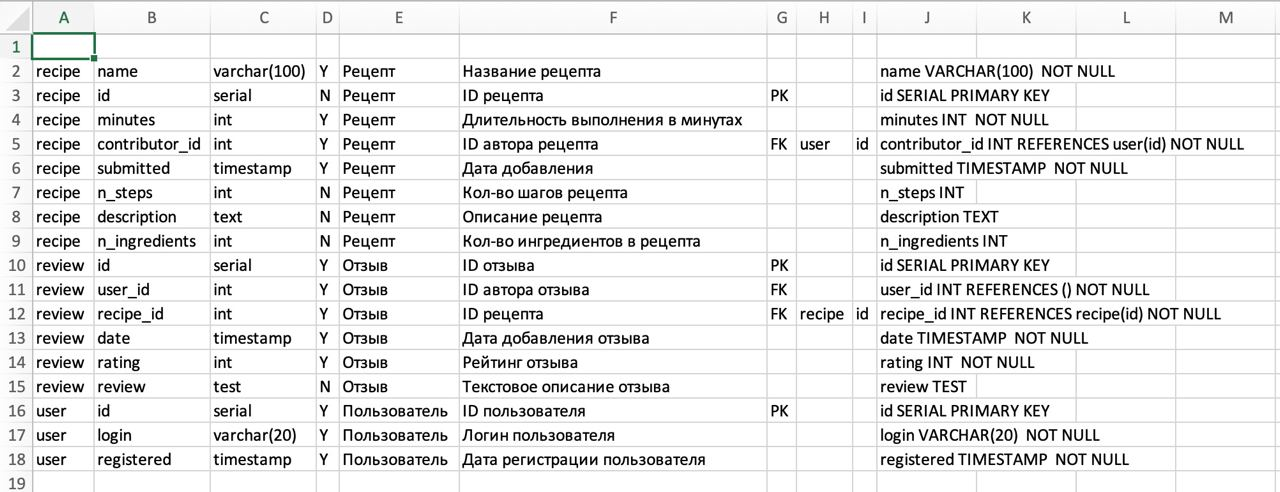

In [73]:
Image('/Users/test/Downloads/rec_mod2.jpg')

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [45]:
# окрашивание заголовков столбцов
sht3.range('A2').expand('right').color = (0,204,255)

# приминение автоподбора ширины столбца
sht3.autofit()

sht3.range('A2').expand('right').font.bold = True

sht3['A2:H2'].api.horizontalalignment = xw.constants.HAlign.xlHAlignCenter

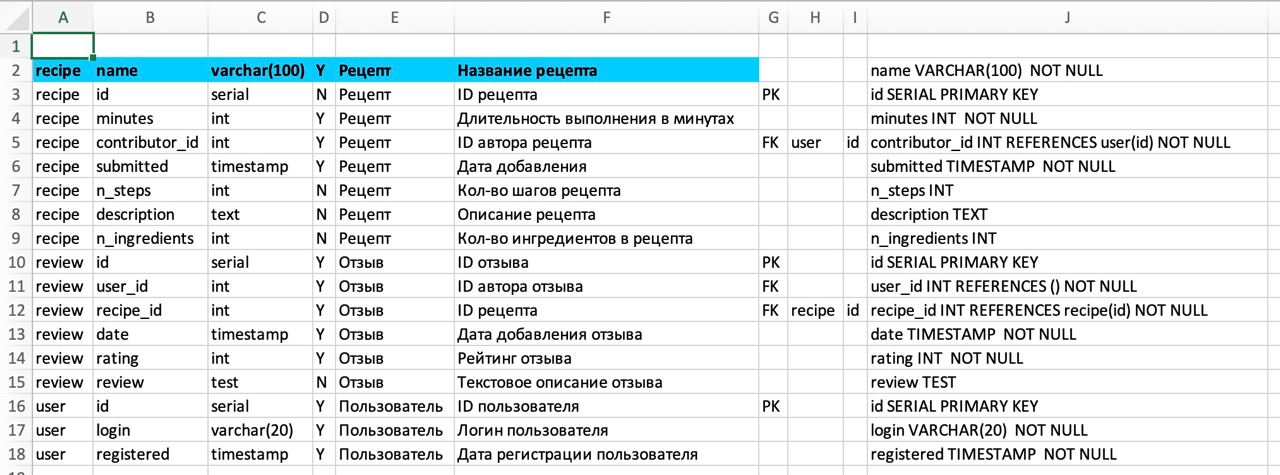

In [74]:
Image('/Users/test/Downloads/rec_mod3.jpg')

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [72]:
#wb1.sheets.add(name = 'Статистика', after = wb1.sheets[0].name) 

In [68]:
sht4 = wb1.sheets['Статистика']

In [75]:
tables = sht3.range('A2').expand('down').value
atributes = sht3.range('B2').expand('down').value
df = pd.DataFrame({'Тип таблицы':tables, 'Количество':atributes}).groupby('Тип таблицы').count()
df

,Количество
Тип таблицы,
recipe,8
review,6
user,3


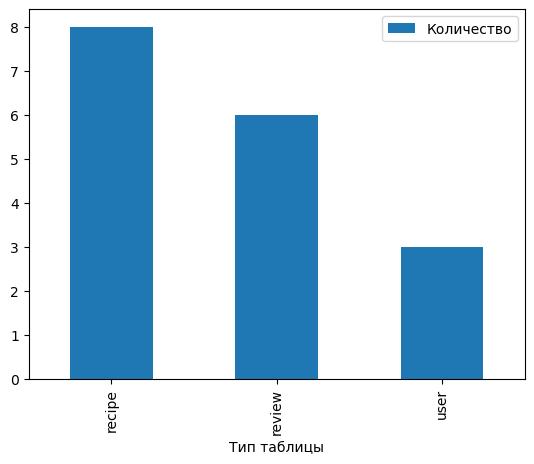

In [76]:
import matplotlib as plt

wb1.sheets['Статистика'].activate()
sht4.range('A1').value = df
graph = df.plot.bar()

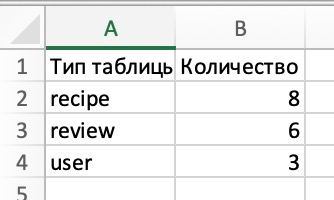

In [77]:
Image('/Users/test/Downloads/rec_mod4.jpg')